### (c) Adaptions

In the previous sections, the models were learned on log airbnb prices. The question is whether we can increase the prediction accuracy if we directly use airbnb prices. An other adaption is to use cross-validation instead of a validation set. The adaptions are tested only on Random Forest and XGBoost, the two best models from the previous part.

#### Airbnb price instead of log airbnb price

The idea is to use airbnb prices instead of log airbnb prices. From Statistics we know that a random variable $X$ is said to follow a log-normal distribution if:

$$ X = e^{\mu + \sigma Z} $$

where $Z$ is standard normally distributed and $\mu$ and $\sigma$ are the mean and the standard deviation on the log-transformed values. The definition also holds for other bases since it holds:

$$ ln(x) = \frac{log_{10}(x)}{log_{10}(e)} $$

and thus:

\begin{align}
\mu^{\ast} & = \int log_{10}(x) f(x) dx = log_{10}(e) \int ln(x) f(x) dx = log_{10}(e) \mu \\
\sigma^{\ast} & = \Big(\int (log_{10}(x)-\mu^{\ast})^2 f(x) dx \Big)^{0.5} = log_{10}(e) \Big( \int (ln(x)-\mu)^2 f(x) dx \Big)^{0.5} = log_{10}(e) \sigma
\end{align}        

Finally, we get:

$$ X = e^{\mu + \sigma Z} = e^{1/log_{10}(e)(\mu^{\ast} + \sigma^{\ast} Z)} = 10^{\mu^{\ast} + \sigma^{\ast} Z} $$

because:

$$ \Big(e^{1/log_{10}(e)}\Big)^{log_{10}(e)} = e = 10^{log_{10}(e)}$$.

A well-known result is that the mean is:

$$ E[X] = e^{\mu + \frac{1}{2}\sigma^2}$$

The median is:

$$ Med[X] = e^{\mu} = 10^{\mu^{\ast}} $$

because of $\mu^{\ast} = log_{10}(e) \mu$. We use the last result to transform the means of the log prices of the constructed aggregations to get the medians. The so transformed features are then used to directly model airbnb prices.

We now implement the adaptions on our datasets.

In [398]:
# Remark: ut stands for untransformed

# Train
#######

# Suburb
train_suburb_ut = train_suburb.copy()
train_suburb_ut['Air_log_price_suburb_same_room_type'] = \
    train_suburb.Air_log_price_suburb_same_room_type.apply(lambda x: 10**x)
train_suburb_ut['Air_log_price'] = train_suburb.Air_log_price.apply(lambda x: 10**x)
train_suburb_ut.rename(columns={'Air_log_price_suburb_same_room_type': 'Air_price_suburb_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 500 m
train_500m_ut = train_500m.copy()
train_500m_ut['Air_log_price_500m_same_room_type'] = \
    train_500m.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
train_500m_ut['Air_log_price'] = train_500m.Air_log_price.apply(lambda x: 10**x)
train_500m_ut.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 100 m
train_100m_ut = train_100m.copy()
train_100m_ut['Air_log_price_100m_same_room_type'] = \
    train_100m.Air_log_price_100m_same_room_type.apply(lambda x: 10**x)
train_100m_ut['Air_log_price'] = train_100m.Air_log_price.apply(lambda x: 10**x)
train_100m_ut.rename(columns={'Air_log_price_100m_same_room_type': 'Air_price_100m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 50 m
train_50m_ut = train_50m.copy()
train_50m_ut['Air_log_price_50m_same_room_type'] = \
    train_50m.Air_log_price_50m_same_room_type.apply(lambda x: 10**x)
train_50m_ut['Air_log_price'] = train_50m.Air_log_price.apply(lambda x: 10**x)
train_50m_ut.rename(columns={'Air_log_price_50m_same_room_type': 'Air_price_50m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# Baseline
train_base_ut = train_base.copy()
train_base_ut['Air_log_price'] = train_base.Air_log_price.apply(lambda x: 10**x)
train_base_ut.rename(columns={'Air_log_price': 'Air_price'}, inplace = True)

# Validation
############

# Suburb
valid_suburb_ut = valid_suburb.copy()
valid_suburb_ut['Air_log_price_suburb_same_room_type'] = \
    valid_suburb.Air_log_price_suburb_same_room_type.apply(lambda x: 10**x)
valid_suburb_ut['Air_log_price'] = valid_suburb.Air_log_price.apply(lambda x: 10**x)
valid_suburb_ut.rename(columns={'Air_log_price_suburb_same_room_type': 'Air_price_suburb_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 500 m
valid_500m_ut = valid_500m.copy()
valid_500m_ut['Air_log_price_500m_same_room_type'] = \
    valid_500m.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
valid_500m_ut['Air_log_price'] = valid_500m.Air_log_price.apply(lambda x: 10**x)
valid_500m_ut.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 100 m
valid_100m_ut = valid_100m.copy()
valid_100m_ut['Air_log_price_100m_same_room_type'] = \
    valid_100m.Air_log_price_100m_same_room_type.apply(lambda x: 10**x)
valid_100m_ut['Air_log_price'] = valid_100m.Air_log_price.apply(lambda x: 10**x)
valid_100m_ut.rename(columns={'Air_log_price_100m_same_room_type': 'Air_price_100m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 50 m
valid_50m_ut = valid_50m.copy()
valid_50m_ut['Air_log_price_50m_same_room_type'] = \
    valid_50m.Air_log_price_50m_same_room_type.apply(lambda x: 10**x)
valid_50m_ut['Air_log_price'] = valid_50m.Air_log_price.apply(lambda x: 10**x)
valid_50m_ut.rename(columns={'Air_log_price_50m_same_room_type': 'Air_price_50m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# Baseline
valid_base_ut = valid_base.copy()
valid_base_ut['Air_log_price'] = valid_base.Air_log_price.apply(lambda x: 10**x)
valid_base_ut.rename(columns={'Air_log_price': 'Air_price'}, inplace = True)

# Test
######

# Suburb
test_suburb_ut = test_suburb.copy()
test_suburb_ut['Air_log_price_suburb_same_room_type'] = \
    test_suburb.Air_log_price_suburb_same_room_type.apply(lambda x: 10**x)
test_suburb_ut['Air_log_price'] = test_suburb.Air_log_price.apply(lambda x: 10**x)
test_suburb_ut.rename(columns={'Air_log_price_suburb_same_room_type': 'Air_price_suburb_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 500 m
test_500m_ut = test_500m.copy()
test_500m_ut['Air_log_price_500m_same_room_type'] = \
    test_500m.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
test_500m_ut['Air_log_price'] = test_500m.Air_log_price.apply(lambda x: 10**x)
test_500m_ut.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 100 m
test_100m_ut = test_100m.copy()
test_100m_ut['Air_log_price_100m_same_room_type'] = \
    test_100m.Air_log_price_100m_same_room_type.apply(lambda x: 10**x)
test_100m_ut['Air_log_price'] = test_100m.Air_log_price.apply(lambda x: 10**x)
test_100m_ut.rename(columns={'Air_log_price_100m_same_room_type': 'Air_price_100m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# 50 m
test_50m_ut = test_50m.copy()
test_50m_ut['Air_log_price_50m_same_room_type'] = \
    test_50m.Air_log_price_50m_same_room_type.apply(lambda x: 10**x)
test_50m_ut['Air_log_price'] = test_50m.Air_log_price.apply(lambda x: 10**x)
test_50m_ut.rename(columns={'Air_log_price_50m_same_room_type': 'Air_price_50m_same_room_type',
                                'Air_log_price': 'Air_price'}, inplace = True)

# Baseline
test_base_ut = test_base.copy()
test_base_ut['Air_log_price'] = test_base.Air_log_price.apply(lambda x: 10**x)
test_base_ut.rename(columns={'Air_log_price': 'Air_price'}, inplace = True)

In [399]:
# Suburb
X_train_suburb_ut = train_suburb_ut.loc[:, ~train_suburb_ut.columns.isin(['Air_price'])].values
y_train_suburb_ut = train_suburb_ut.loc[:, 'Air_price'].values

X_valid_suburb_ut = valid_suburb_ut.loc[:, ~valid_suburb_ut.columns.isin(['Air_price'])].values
y_valid_suburb_ut = valid_suburb_ut.loc[:, 'Air_price'].values

X_test_suburb_ut = test_suburb_ut.loc[:, ~test_suburb_ut.columns.isin(['Air_price'])].values
y_test_suburb_ut = test_suburb_ut.loc[:, 'Air_price'].values

# 500m
X_train_500m_ut = train_500m_ut.loc[:, ~train_500m_ut.columns.isin(['Air_price'])].values
y_train_500m_ut = train_500m_ut.loc[:, 'Air_price'].values

X_valid_500m_ut = valid_500m_ut.loc[:, ~valid_500m_ut.columns.isin(['Air_price'])].values
y_valid_500m_ut = valid_500m_ut.loc[:, 'Air_price'].values

X_test_500m_ut = test_500m_ut.loc[:, ~test_500m_ut.columns.isin(['Air_price'])].values
y_test_500m_ut = test_500m_ut.loc[:, 'Air_price'].values

# 100m
X_train_100m_ut = train_100m_ut.loc[:, ~train_100m_ut.columns.isin(['Air_price'])].values
y_train_100m_ut = train_100m_ut.loc[:, 'Air_price'].values

X_valid_100m_ut = valid_100m_ut.loc[:, ~valid_100m_ut.columns.isin(['Air_price'])].values
y_valid_100m_ut = valid_100m_ut.loc[:, 'Air_price'].values

X_test_100m_ut = test_100m_ut.loc[:, ~test_100m_ut.columns.isin(['Air_price'])].values
y_test_100m_ut = test_100m_ut.loc[:, 'Air_price'].values

# 50m
X_train_50m_ut = train_50m_ut.loc[:, ~train_50m_ut.columns.isin(['Air_price'])].values
y_train_50m_ut = train_50m_ut.loc[:, 'Air_price'].values

X_valid_50m_ut = valid_50m_ut.loc[:, ~valid_50m_ut.columns.isin(['Air_price'])].values
y_valid_50m_ut = valid_50m_ut.loc[:, 'Air_price'].values

X_test_50m_ut = test_50m_ut.loc[:, ~test_50m_ut.columns.isin(['Air_price'])].values
y_test_50m_ut = test_50m_ut.loc[:, 'Air_price'].values

# baseline
X_train_base_ut = train_base_ut.loc[:, ~train_base_ut.columns.isin(['Air_price'])].values
y_train_base_ut = train_base_ut.loc[:, 'Air_price'].values

X_valid_base_ut = valid_base_ut.loc[:, ~valid_base_ut.columns.isin(['Air_price'])].values
y_valid_base_ut = valid_base_ut.loc[:, 'Air_price'].values

X_test_base_ut = test_base_ut.loc[:, ~test_base_ut.columns.isin(['Air_price'])].values
y_test_base_ut = test_base_ut.loc[:, 'Air_price'].values

Next, we estimate the models and plot the results. 
<!--- The prices are falsely labeled as log prices in the plots. --->

*Aggregation by suburbs*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.66 / RMSE train 50.53 / MAE train 32.44 / Nobs: 14261
R2 test: 0.59 / RMSE test 55.05 / MAE test 36.17 / Nobs: 4451


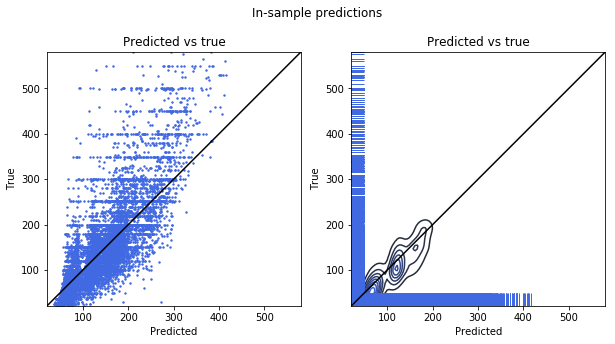

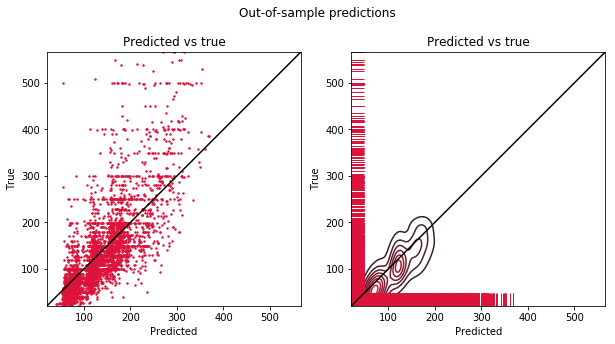

In [400]:
train_tpl = (X_train_suburb_ut, y_train_suburb_ut)
test_tpl = (X_test_suburb_ut, y_test_suburb_ut)
rf_suburb_ut = print_results('RF_suburbs_ut.p', test_tpl, train_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.69 / RMSE train 48.10 / MAE train 31.28 / Nobs: 14261
R2 test: 0.56 / RMSE test 56.52 / MAE test 36.76 / Nobs: 4451


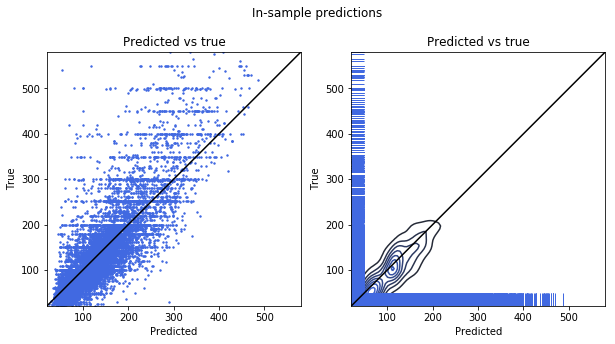

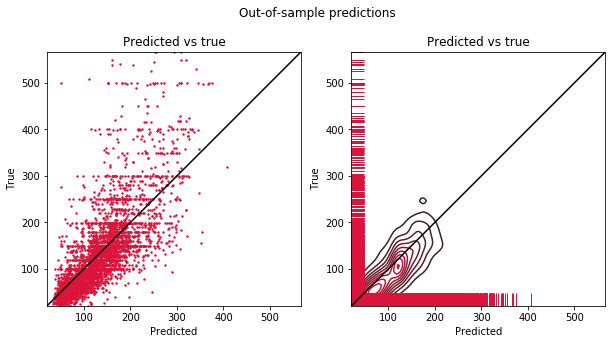

In [401]:
train_tpl = (X_train_suburb_ut, y_train_suburb_ut)
test_tpl = (X_test_suburb_ut, y_test_suburb_ut)
xgb_suburb_ut = print_results('XGB_suburbs_ut.p', test_tpl, train_tpl, None, True)

*Constructed aggregation - 500m*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.78 / RMSE train 40.16 / MAE train 25.46 / Nobs: 13230
R2 test: 0.63 / RMSE test 52.38 / MAE test 33.17 / Nobs: 3739


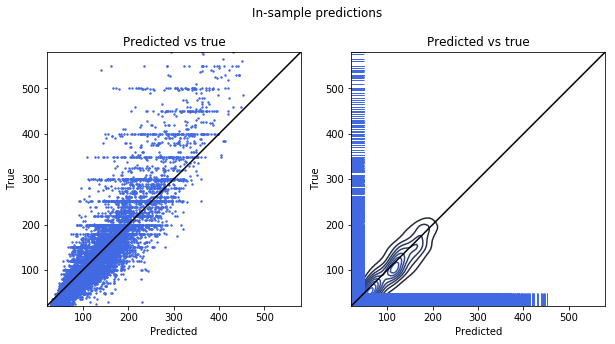

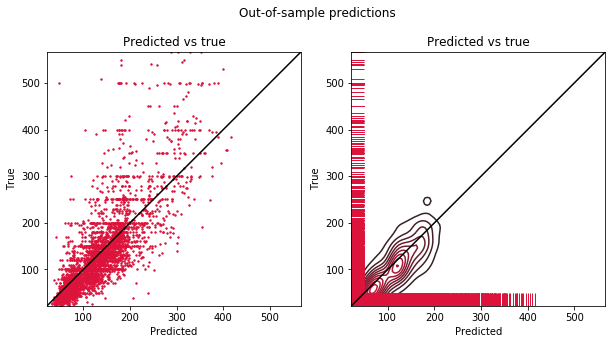

In [402]:
train_tpl = (X_train_500m_ut, y_train_500m_ut)
test_tpl = (X_test_500m_ut, y_test_500m_ut)
rf_500m_ut = print_results('RF_500m_ut.p', test_tpl, train_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.77 / RMSE train 41.13 / MAE train 26.87 / Nobs: 13230
R2 test: 0.65 / RMSE test 50.94 / MAE test 32.48 / Nobs: 3739


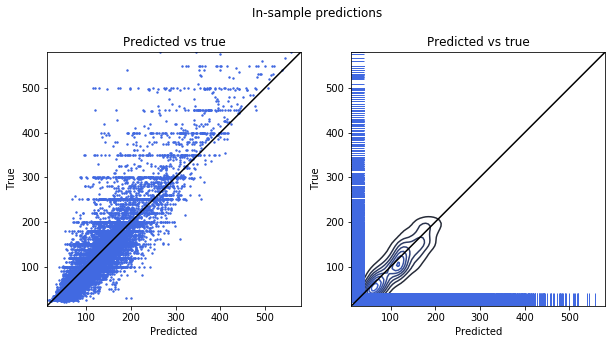

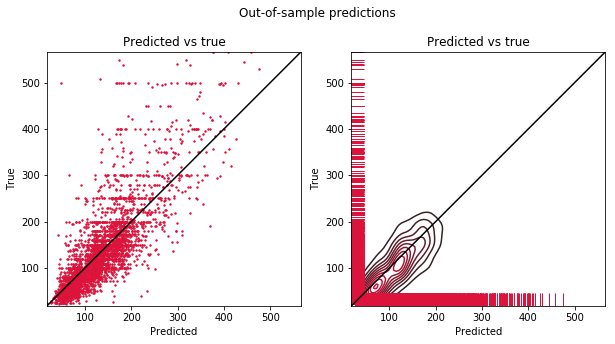

In [403]:
train_tpl = (X_train_500m_ut, y_train_500m_ut)
test_tpl = (X_test_500m_ut, y_test_500m_ut)
xgb_500m_ut = print_results('XGB_500m_ut.p', test_tpl, train_tpl, None, True)

*Constructed aggregation - 100m*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.75 / RMSE train 41.09 / MAE train 26.73 / Nobs: 9203
R2 test: 0.61 / RMSE test 48.18 / MAE test 31.39 / Nobs: 2177


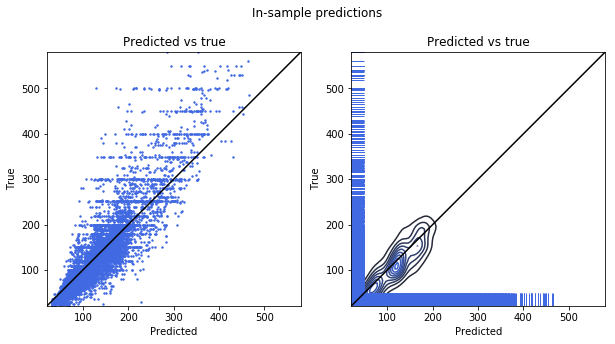

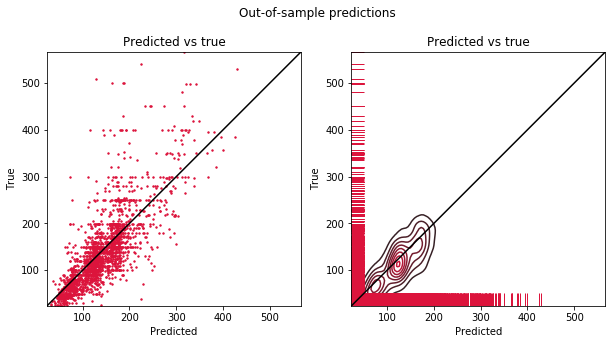

In [404]:
train_tpl = (X_train_100m_ut, y_train_100m_ut)
test_tpl = (X_test_100m_ut, y_test_100m_ut)
rf_100m_ut = print_results('RF_100m_ut.p', test_tpl, train_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.78 / RMSE train 39.12 / MAE train 25.46 / Nobs: 9203
R2 test: 0.63 / RMSE test 47.22 / MAE test 30.72 / Nobs: 2177


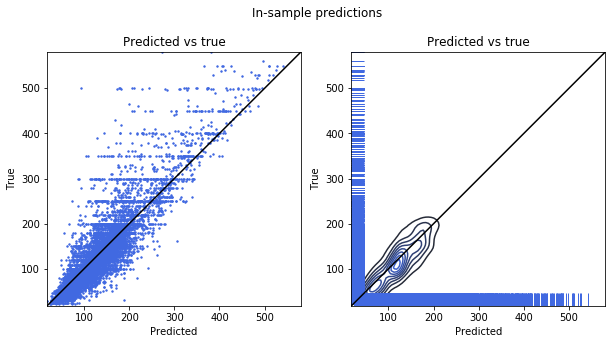

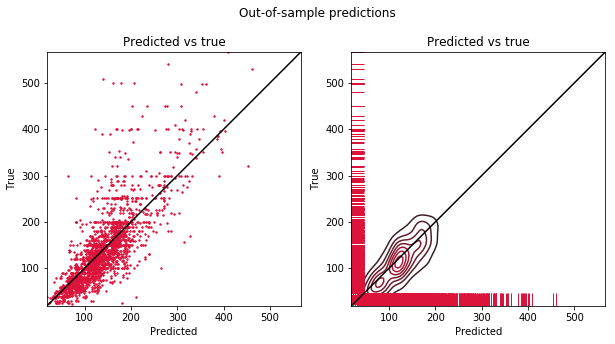

In [405]:
train_tpl = (X_train_100m_ut, y_train_100m_ut)
test_tpl = (X_test_100m_ut, y_test_100m_ut)
xgb_100m_ut = print_results('XGB_100m_ut.p', test_tpl, train_tpl, None, True)

*Constructed aggregation - 50m*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.73 / RMSE train 42.35 / MAE train 27.61 / Nobs: 6522
R2 test: 0.60 / RMSE test 46.35 / MAE test 30.69 / Nobs: 1340


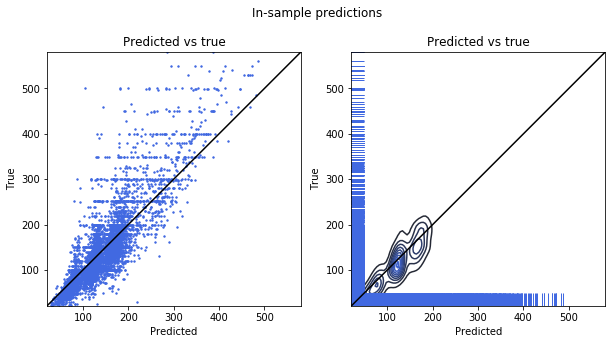

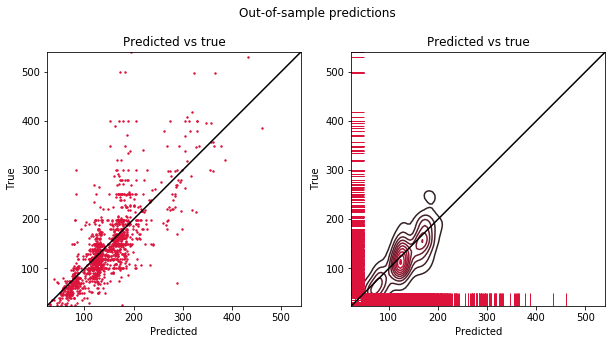

In [406]:
train_tpl = (X_train_50m_ut, y_train_50m_ut)
test_tpl = (X_test_50m_ut, y_test_50m_ut)
rf_50m_ut = print_results('RF_50m_ut.p', test_tpl, train_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.80 / RMSE train 36.55 / MAE train 23.37 / Nobs: 6522
R2 test: 0.61 / RMSE test 45.51 / MAE test 30.27 / Nobs: 1340


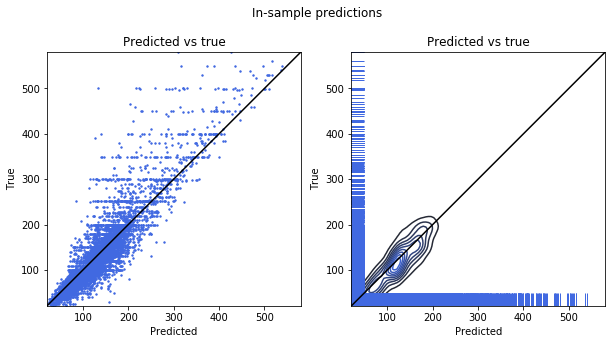

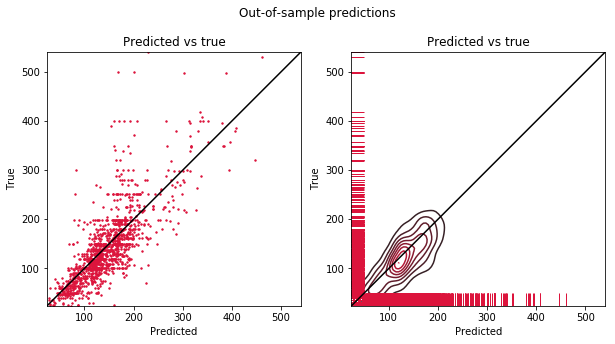

In [407]:
train_tpl = (X_train_50m_ut, y_train_50m_ut)
test_tpl = (X_test_50m_ut, y_test_50m_ut)
xgb_50m_ut = print_results('XGB_50m_ut.p', test_tpl, train_tpl, None, True)

The following plot summarizes the results. To directly estimate the models with untransformed airbnb prices slightly improves the predictions. The code for the plots is adapted from https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py.

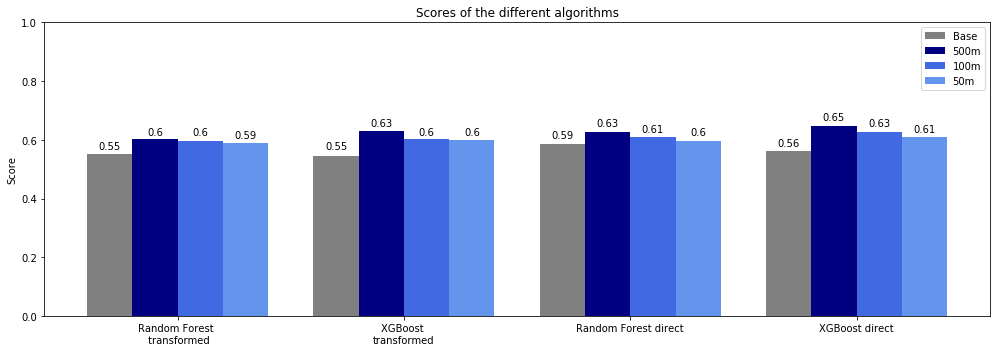

In [408]:
# Source: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

scores_suburb = [rf_suburb['test_r2_transformed'],
                 xgb_suburb['test_r2_transformed'],
                 rf_suburb_ut['test_r2'],
                 xgb_suburb_ut['test_r2']]

scores_500m = [rf_500m['test_r2_transformed'],
               xgb_500m['test_r2_transformed'],
               rf_500m_ut['test_r2'],
               xgb_500m_ut['test_r2']]

scores_100m = [rf_100m['test_r2_transformed'],
               xgb_100m['test_r2_transformed'],
               rf_100m_ut['test_r2'],
               xgb_100m_ut['test_r2']]

scores_50m = [rf_50m['test_r2_transformed'],
               xgb_50m['test_r2_transformed'],
               rf_50m_ut['test_r2'],
               xgb_50m_ut['test_r2']]


labels = ['Random Forest \n transformed', 'XGBoost \ntransformed', 'Random Forest direct', 'XGBoost direct']

factor = 1.5
x = np.arange(len(labels))*factor  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 5))
rects1 = ax.bar(x - 1.5*width, scores_suburb, width, label='Base', color='grey')
rects2 = ax.bar(x - 0.5*width, scores_500m, width, label='500m', color='navy')
rects3 = ax.bar(x + 0.5*width, scores_100m, width, label='100m', color='royalblue')
rects4 = ax.bar(x + 1.5*width, scores_50m, width, label='50m', color='cornflowerblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores of the different algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0.0,1])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

fig.tight_layout()

plt.show()

#### Cross validation

We haven't used cross validation because we would mix up information from the cross validation training and test sets. Nevertheless, we use cross validation here to see if we can improve the model despite of the mentioned problem.

*Aggregation by suburbs*

In [409]:
# Concatenation of training and validation set
X_train_cv = np.concatenate([X_train_suburb, X_valid_suburb])
y_train_cv = np.concatenate([y_train_suburb, y_valid_suburb])

train_cv_tpl = (X_train_cv, y_train_cv)

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.93 / RMSE train 0.07 / MAE train 0.05 / Nobs: 17818
R2 test: 0.62 / RMSE test 0.16 / MAE test 0.12 / Nobs: 4451


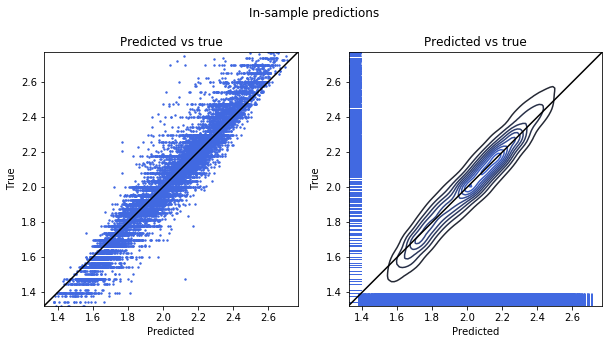

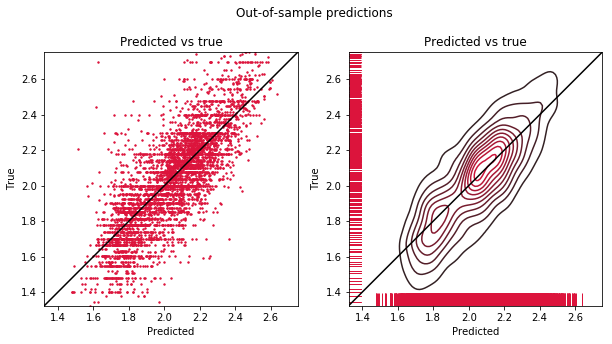

In [410]:
test_tpl = (X_test_suburb, y_test_suburb)
rf_suburb_cv = print_results('RF_suburbs_cv.p', test_tpl, train_cv_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.90 / RMSE train 0.09 / MAE train 0.06 / Nobs: 17818
R2 test: 0.37 / RMSE test 0.21 / MAE test 0.17 / Nobs: 4451


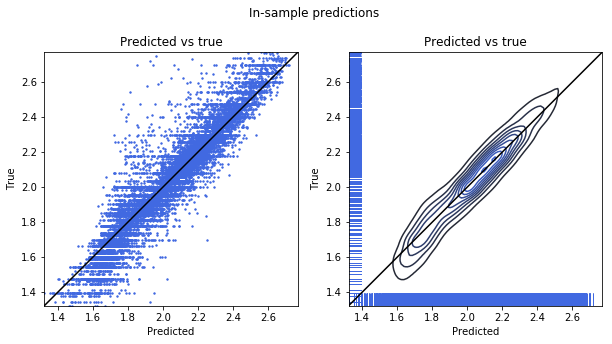

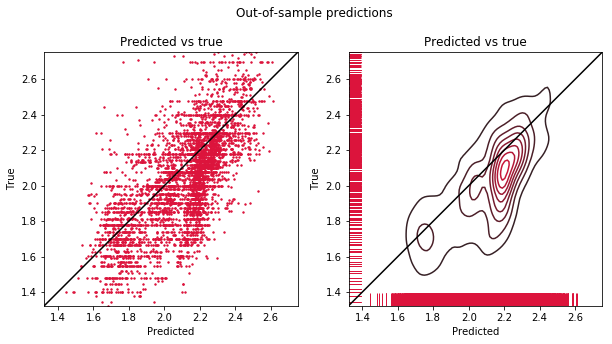

In [411]:
test_tpl = (X_test_suburb, y_test_suburb)
xgb_suburb_cv = print_results('XGB_suburbs_cv.p', test_tpl, train_cv_tpl, None, True)

*Constructed aggregations - 500m*

In [412]:
# Concatenation of training and validation set
X_train_cv = np.concatenate([X_train_500m, X_valid_500m])
y_train_cv = np.concatenate([y_train_500m, y_valid_500m])

train_cv_tpl = (X_train_cv, y_train_cv)

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.80 / RMSE train 0.12 / MAE train 0.09 / Nobs: 16091
R2 test: 0.70 / RMSE test 0.14 / MAE test 0.10 / Nobs: 3739


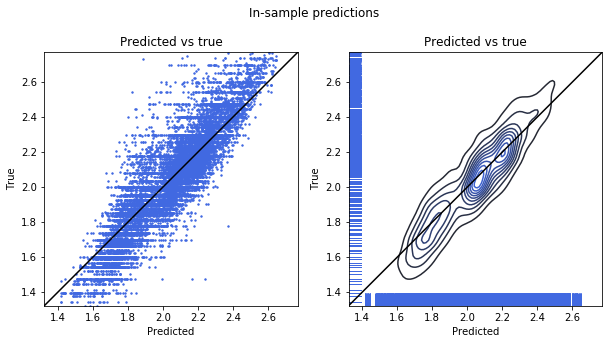

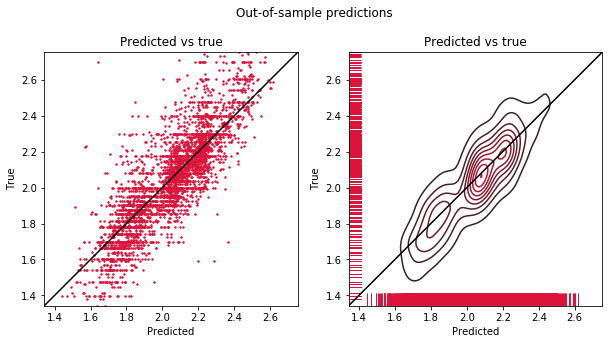

In [413]:
test_tpl = (X_test_500m, y_test_500m)
rf_500m_cv = print_results('RF_500m_cv.p', test_tpl, train_cv_tpl, None, True)

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.77 / RMSE train 0.13 / MAE train 0.09 / Nobs: 16091
R2 test: 0.71 / RMSE test 0.14 / MAE test 0.10 / Nobs: 3739


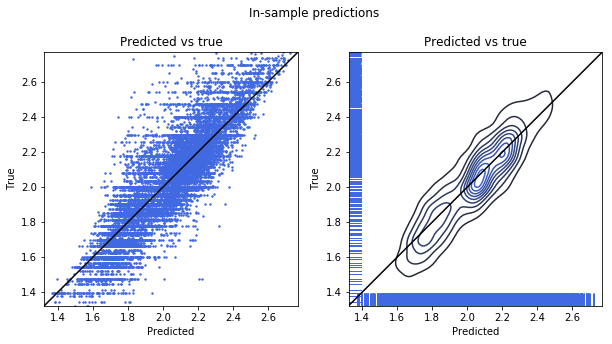

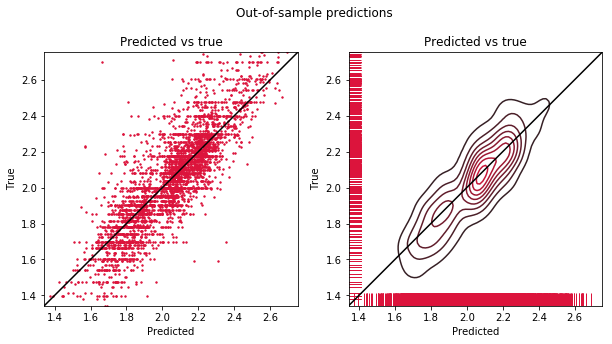

In [414]:
test_tpl = (X_test_500m, y_test_500m)
xgb_500m_cv = print_results('XGB_500m_cv.p', test_tpl, train_cv_tpl, None, True)

Again, we plot the performance measures. The code for the plots is adapted from https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py.

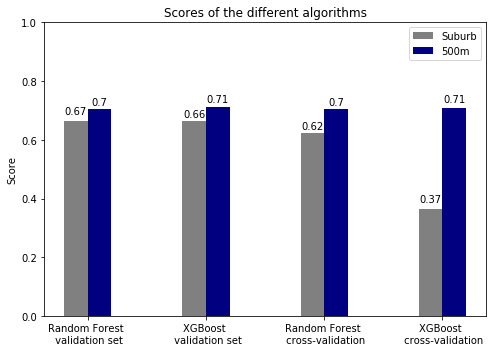

In [415]:
# Source: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

scores_suburb = [rf_suburb['test_r2'],
                 xgb_suburb['test_r2'],
                 rf_suburb_cv['test_r2'],
                 xgb_suburb_cv['test_r2']]

scores_500m = [rf_500m['test_r2'],
               xgb_500m['test_r2'],
               rf_500m_cv['test_r2'],
               xgb_500m_cv['test_r2']]


labels = ['Random Forest \n validation set', 'XGBoost \n validation set', 'Random Forest \n cross-validation', 'XGBoost \n cross-validation']

factor = 1.5
x = np.arange(len(labels))*factor  # the label locations
width = 0.30  # the width of the bars

fig, ax = plt.subplots(figsize=(7, 5))
rects1 = ax.bar(x - 0.5*width, scores_suburb, width, label='Suburb', color='grey')
rects2 = ax.bar(x + 0.5*width, scores_500m, width, label='500m', color='navy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores of the different algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0.0,1])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

#### Additional variables

From the EDA part we  know that it might be useful to include `Air_cleaning_fee` and `Air_review_scores_location`. Whether we can improve our models this way is investigated next. We predict airbnb prices directly and indirectly via log airbnb prices and a back transformation.

In [416]:
train_one_hot = pd.get_dummies(train.loc[:, ['Air_property_type_2', 'Air_room_type', 
                                      'Air_cancellation_policy_2', 
                                      'Air_neighbourhood_cleansed']],
                              drop_first=True)
train_one_hot.head(5)

valid_one_hot = pd.get_dummies(valid.loc[:, ['Air_property_type_2', 'Air_room_type', 
                                      'Air_cancellation_policy_2', 
                                      'Air_neighbourhood_cleansed']],
                              drop_first=True)
valid_one_hot.head(5)

test_one_hot = pd.get_dummies(test.loc[:, ['Air_property_type_2', 'Air_room_type', 
                                      'Air_cancellation_policy_2',
                                      'Air_neighbourhood_cleansed']],
                             drop_first=True)
test_one_hot.head(5)

,Air_property_type_2_House_Cottage_Villa,Air_property_type_2_Other,Air_property_type_2_Townhouse,Air_room_type_Private room,Air_room_type_Shared room,Air_cancellation_policy_2_moderate,Air_cancellation_policy_2_strict,Air_neighbourhood_cleansed_Bayside,Air_neighbourhood_cleansed_Boroondara,Air_neighbourhood_cleansed_Brimbank,...,Air_neighbourhood_cleansed_Moonee Valley,Air_neighbourhood_cleansed_Moreland,Air_neighbourhood_cleansed_Nillumbik,Air_neighbourhood_cleansed_Port Phillip,Air_neighbourhood_cleansed_Stonnington,Air_neighbourhood_cleansed_Whitehorse,Air_neighbourhood_cleansed_Whittlesea,Air_neighbourhood_cleansed_Wyndham,Air_neighbourhood_cleansed_Yarra,Air_neighbourhood_cleansed_Yarra Ranges
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [417]:
# Train
train_add = pd.concat([merged_train.loc[:, ['Air_log_price',
                                            'Air_log_price_500m_same_room_type', # 0
                                            'Air_calculated_host_listings_count', # 1
                                            'Air_cleaning_fee', # 2
                                            'Air_bathrooms', # 3
                                            'Air_beds', # 4
                                            'Air_bedrooms', # 5
                                            'Air_accommodates', # 6
                                            'Air_extra_people', # 7
                                            'Air_guests_included', # 8
                                            'Air_distance_to_CBD', # 9
                                            'Air_review_scores_location' # 10
                                           ]],
                                       train_one_hot], axis=1)

# Valid
valid_add = pd.concat([merged_train.loc[:, ['Air_log_price', 
                                            'Air_log_price_500m_same_room_type', # 0
                                            'Air_calculated_host_listings_count', # 1
                                            'Air_cleaning_fee', # 2
                                            'Air_bathrooms', # 3
                                            'Air_beds', # 4
                                            'Air_bedrooms', # 5
                                            'Air_accommodates', # 6
                                            'Air_extra_people', # 7
                                            'Air_guests_included', # 8
                                            'Air_distance_to_CBD', # 9
                                            'Air_review_scores_location' # 10
                                           ]],
                                      valid_one_hot], axis=1)

# Test
test_add = pd.concat([merged_test.loc[:, ['Air_log_price', 
                                          'Air_log_price_500m_same_room_type', # 0
                                          'Air_calculated_host_listings_count', # 1
                                          'Air_cleaning_fee', # 2
                                          'Air_bathrooms', # 3
                                          'Air_beds', # 4
                                          'Air_bedrooms', # 5
                                          'Air_accommodates', # 6
                                          'Air_extra_people', # 7
                                          'Air_guests_included', # 8
                                          'Air_distance_to_CBD', # 9
                                          'Air_review_scores_location' # 10
                                         ]],
                                      test_one_hot], axis=1)

In [418]:
train_add.head(5)

,Air_log_price,Air_log_price_500m_same_room_type,Air_calculated_host_listings_count,Air_cleaning_fee,Air_bathrooms,Air_beds,Air_bedrooms,Air_accommodates,Air_extra_people,Air_guests_included,...,Air_neighbourhood_cleansed_Moonee Valley,Air_neighbourhood_cleansed_Moreland,Air_neighbourhood_cleansed_Nillumbik,Air_neighbourhood_cleansed_Port Phillip,Air_neighbourhood_cleansed_Stonnington,Air_neighbourhood_cleansed_Whitehorse,Air_neighbourhood_cleansed_Whittlesea,Air_neighbourhood_cleansed_Wyndham,Air_neighbourhood_cleansed_Yarra,Air_neighbourhood_cleansed_Yarra Ranges
0,1.954243,1.887373,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1.812913,1.774898,3.0,20.0,NaN,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,2.176091,2.327473,1.0,60.0,2.0,2.0,2.0,4.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,1.662758,1.887697,1.0,NaN,1.0,1.0,1.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,1.949390,1.700186,1.0,20.0,1.0,1.0,2.0,2.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [419]:
train_add_log = train_add.copy()
valid_add_log = valid_add.copy()
test_add_log = test_add.copy()

In [420]:
# Transformation
# --------------

# Train
#######

train_add['Air_log_price_500m_same_room_type'] = \
    train_add.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
train_add['Air_log_price'] = train_add.Air_log_price.apply(lambda x: 10**x)
train_add.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                          'Air_log_price': 'Air_price'}, inplace = True)


# Validation
############

valid_add['Air_log_price_500m_same_room_type'] = \
    valid_add.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
valid_add['Air_log_price'] = valid_add.Air_log_price.apply(lambda x: 10**x)
valid_add.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                          'Air_log_price': 'Air_price'}, inplace = True)

# Test
######

test_add['Air_log_price_500m_same_room_type'] = \
    test_add.Air_log_price_500m_same_room_type.apply(lambda x: 10**x)
test_add['Air_log_price'] = test_add.Air_log_price.apply(lambda x: 10**x)
test_add.rename(columns={'Air_log_price_500m_same_room_type': 'Air_price_500m_same_room_type',
                          'Air_log_price': 'Air_price'}, inplace = True)

In [421]:
train_add.head()

,Air_price,Air_price_500m_same_room_type,Air_calculated_host_listings_count,Air_cleaning_fee,Air_bathrooms,Air_beds,Air_bedrooms,Air_accommodates,Air_extra_people,Air_guests_included,...,Air_neighbourhood_cleansed_Moonee Valley,Air_neighbourhood_cleansed_Moreland,Air_neighbourhood_cleansed_Nillumbik,Air_neighbourhood_cleansed_Port Phillip,Air_neighbourhood_cleansed_Stonnington,Air_neighbourhood_cleansed_Whitehorse,Air_neighbourhood_cleansed_Whittlesea,Air_neighbourhood_cleansed_Wyndham,Air_neighbourhood_cleansed_Yarra,Air_neighbourhood_cleansed_Yarra Ranges
0,90.0,77.156558,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,65.0,59.552222,3.0,20.0,NaN,1.0,1.0,1.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,150.0,212.555875,1.0,60.0,2.0,2.0,2.0,4.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,46.0,77.214240,1.0,NaN,1.0,1.0,1.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
4,89.0,50.140159,1.0,20.0,1.0,1.0,2.0,2.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,0


In [422]:
valid_add.head()

,Air_price,Air_price_500m_same_room_type,Air_calculated_host_listings_count,Air_cleaning_fee,Air_bathrooms,Air_beds,Air_bedrooms,Air_accommodates,Air_extra_people,Air_guests_included,...,Air_neighbourhood_cleansed_Moonee Valley,Air_neighbourhood_cleansed_Moreland,Air_neighbourhood_cleansed_Nillumbik,Air_neighbourhood_cleansed_Port Phillip,Air_neighbourhood_cleansed_Stonnington,Air_neighbourhood_cleansed_Whitehorse,Air_neighbourhood_cleansed_Whittlesea,Air_neighbourhood_cleansed_Wyndham,Air_neighbourhood_cleansed_Yarra,Air_neighbourhood_cleansed_Yarra Ranges
0,90.0,77.156558,1.0,0.0,1.0,1.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,65.0,59.552222,3.0,20.0,NaN,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,150.0,212.555875,1.0,60.0,2.0,2.0,2.0,4.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46.0,77.214240,1.0,NaN,1.0,1.0,1.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,89.0,50.140159,1.0,20.0,1.0,1.0,2.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [423]:
test_add.head()

,Air_price,Air_price_500m_same_room_type,Air_calculated_host_listings_count,Air_cleaning_fee,Air_bathrooms,Air_beds,Air_bedrooms,Air_accommodates,Air_extra_people,Air_guests_included,...,Air_neighbourhood_cleansed_Moonee Valley,Air_neighbourhood_cleansed_Moreland,Air_neighbourhood_cleansed_Nillumbik,Air_neighbourhood_cleansed_Port Phillip,Air_neighbourhood_cleansed_Stonnington,Air_neighbourhood_cleansed_Whitehorse,Air_neighbourhood_cleansed_Whittlesea,Air_neighbourhood_cleansed_Wyndham,Air_neighbourhood_cleansed_Yarra,Air_neighbourhood_cleansed_Yarra Ranges
0,136.0,133.789691,62.0,60.0,1.0,1.0,0.0,2.0,0.0,1.0,...,0,0,0,0,1,0,0,0,0,0
1,35.0,50.000000,1.0,NaN,1.0,1.0,1.0,2.0,0.0,1.0,...,0,0,0,0,0,1,0,0,0,0
2,100.0,170.574044,1.0,45.0,1.0,1.0,1.0,2.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,150.0,NaN,1.0,50.0,2.0,3.0,3.0,6.0,10.0,2.0,...,0,0,0,0,0,1,0,0,0,0
4,145.0,128.177536,5.0,160.0,1.0,3.0,2.0,6.0,15.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [424]:
# Direct
X_train_add = train_add.loc[:, ~train_add.columns.isin(['Air_price'])] #.values
y_train_add = train_add.loc[:, 'Air_price'] #.values

X_valid_add = valid_add.loc[:, ~valid_add.columns.isin(['Air_price'])] #.values
y_valid_add = valid_add.loc[:, 'Air_price'] #.values

X_test_add = test_add.loc[:, ~test_add.columns.isin(['Air_price'])] #.values
y_test_add = test_add.loc[:, 'Air_price'] #.values

# Log transformed
X_train_add_log = train_add_log.loc[:, ~train_add_log.columns.isin(['Air_log_price'])] #.values
y_train_add_log = train_add_log.loc[:, 'Air_log_price'] #.values

X_valid_add_log = valid_add_log.loc[:, ~valid_add_log.columns.isin(['Air_log_price'])] #.values
y_valid_add_log = valid_add_log.loc[:, 'Air_log_price'] #.values

X_test_add_log = test_add_log.loc[:, ~test_add_log.columns.isin(['Air_log_price'])] #.values
y_test_add_log = test_add_log.loc[:, 'Air_log_price'] #.values

**Direct**

In [425]:
train_tpl = (X_train_add, y_train_add)
valid_tpl = (X_valid_add, y_valid_add)

*Constructed aggregation - 500m*

Random Forest

*This stepis time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.89 / RMSE train 26.18 / MAE train 16.42 / Nobs: 8448
R2 test: 0.65 / RMSE test 48.92 / MAE test 30.16 / Nobs: 2453


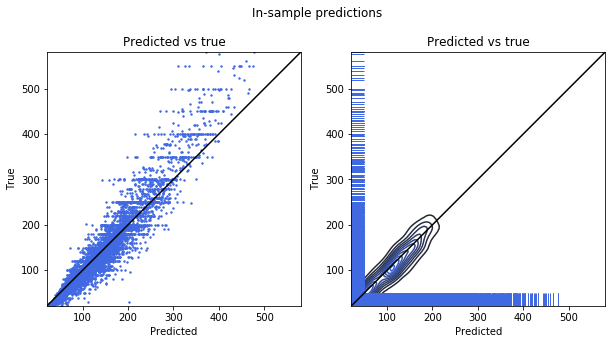

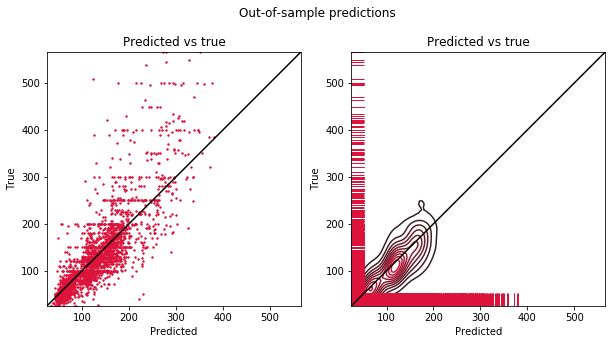

In [426]:
test_tpl = (X_test_add, y_test_add)
rf_add = print_results('RF_add.p', test_tpl, train_tpl, None, True)

In [427]:
best_params = rf_add['fitted_model'].best_params_
best_params

{'n_estimators': 40,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

XGBoost

Untransformed
-------------
R2 train: 0.99 / RMSE train 5.69 / MAE train 3.39 / Nobs: 8448
R2 test: 0.63 / RMSE test 50.16 / MAE test 31.12 / Nobs: 2453


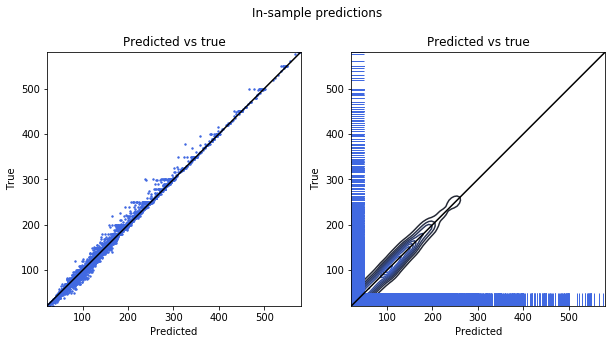

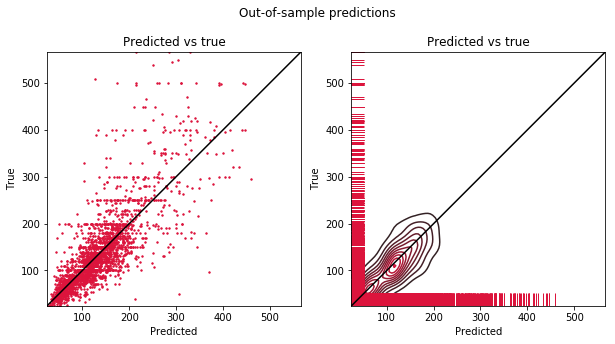

In [428]:
test_tpl = (X_test_add, y_test_add)
xgb_add = print_results('XGB_add.p', test_tpl, train_tpl, None, True)

In [429]:
best_params = xgb_add['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 1,
 'xgb__max_depth': 15,
 'xgb__gamma': 0.4,
 'xgb__eta': 0.3,
 'xgb__colsample_bytree': 1}

**Log-transformation**

In [430]:
train_tpl = (X_train_add_log, y_train_add_log)
valid_tpl = (X_valid_add_log, y_valid_add_log)

*Constructed aggregation - 500m*

Random Forest

Untransformed
-------------
R2 train: 0.92 / RMSE train 0.07 / MAE train 0.05 / Nobs: 8448
R2 test: 0.73 / RMSE test 0.13 / MAE test 0.09 / Nobs: 2453

Transformed
-----------
R2 train: 0.87 / RMSE train 28.67 / MAE train 16.35 / Nobs: 8448
R2 test: 0.63 / RMSE test 50.34 / MAE test 29.42 / Nobs: 2453



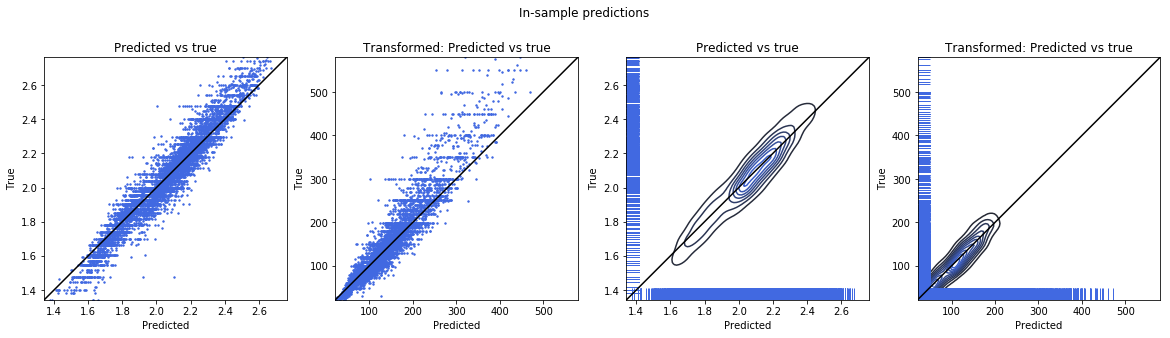

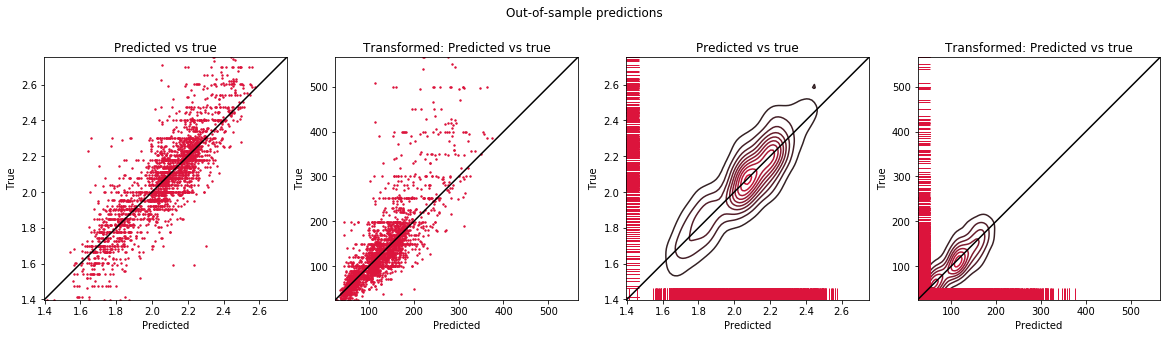

In [431]:
test_tpl = (X_test_add_log, y_test_add_log)
rf_add_log = print_results('RF_add_log.p', test_tpl, train_tpl, 'both', True)

In [432]:
best_params = rf_add_log['fitted_model'].best_params_
best_params

{'n_estimators': 40,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

XGBoost

Untransformed
-------------
R2 train: 0.96 / RMSE train 0.05 / MAE train 0.03 / Nobs: 8448
R2 test: 0.73 / RMSE test 0.13 / MAE test 0.09 / Nobs: 2453

Transformed
-----------
R2 train: 0.94 / RMSE train 18.98 / MAE train 10.63 / Nobs: 8448
R2 test: 0.65 / RMSE test 48.78 / MAE test 29.35 / Nobs: 2453



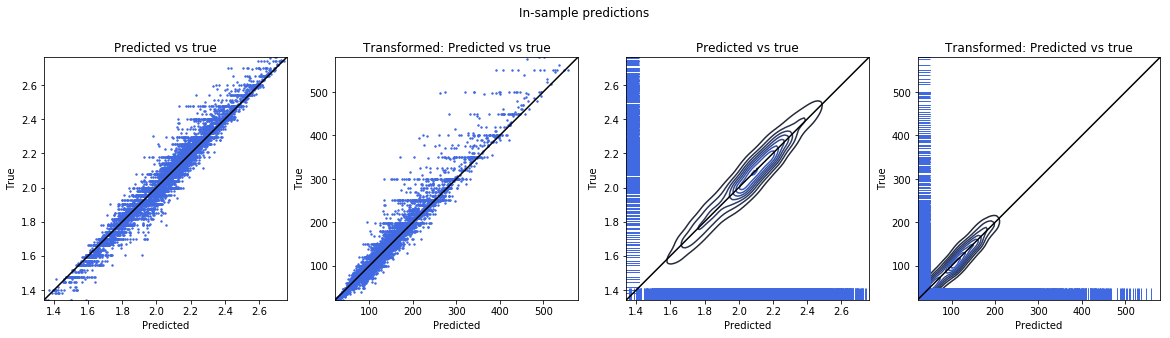

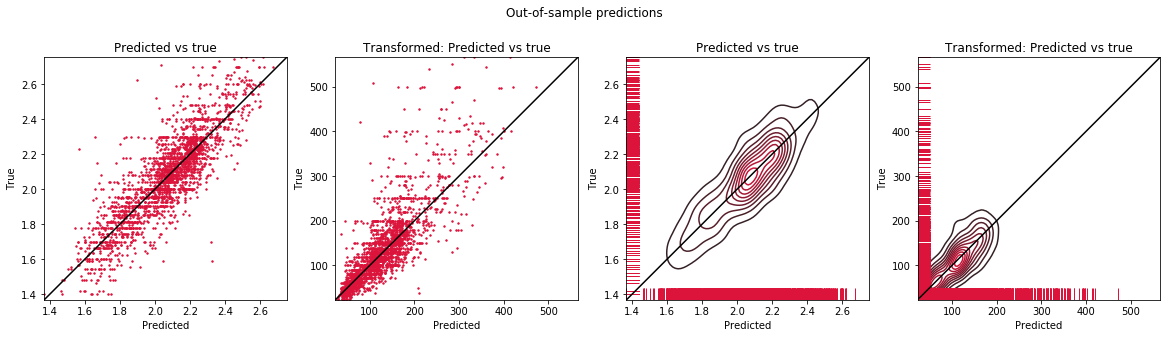

In [433]:
test_tpl = (X_test_add_log, y_test_add_log)
xgb_add_log = print_results('XGB_add_log.p', test_tpl, train_tpl, 'both', True)

In [434]:
best_params = xgb_add_log['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 5,
 'xgb__max_depth': 15,
 'xgb__gamma': 0.0,
 'xgb__eta': 0.05,
 'xgb__colsample_bytree': 0.7}

#### PCA on specific variables

The idea of this section is to apply PCA (principal components analysis) on specific variables as e.g. the variables about the size of the accommodations or the neighbourhoods. This can be done by applying `FeatureUnion`and `FunctionTransformer`.`StandardScaler` is used upfront. A less error prone implementation of the transformation function (see the next cell) might be achieved by using `sklearn-pandas`. Again, airbnb prices are predicted directly and indirectly.

**Literature** <br>
https://stackoverflow.com/questions/53561598/sklearn-pipeline-with-pca-on-feature-subset-using-functiontransformer <br>
https://github.com/scikit-learn-contrib/sklearn-pandas

In [435]:
# A less error prone approache would be based on subsetting the data by variable names. 
# This might be achieved by `sklearn-pandas`. 
d2 = X_train_add.shape[1]
set_acc = set(np.arange(3,9))
set_neigh = set(np.arange(11,d2))
set_all = set(np.arange(d2))
set_rest = set_all.difference(set_acc)
set_rest = set_rest.difference(set_neigh)

def accommodation_info(X):
    return X[:, list(set_all)]

def neighbourhood(X):
    return X[:, list(set_neigh)]

def exclude(X):
    return X[:, list(set_rest)]

In [436]:
# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree (there are 47 features in total in this example)
max_depth = [int(x) for x in np.linspace(5, 20, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 10]

param_grid_rf_pca = {'rf__n_estimators': n_estimators,
                     'rf__max_features': max_features,
                     'rf__max_depth': max_depth,
                     'rf__min_samples_split': min_samples_split,
                     'rf__min_samples_leaf': min_samples_leaf,
                     'feats__pipe1__pca1__n_components': [1,2,3,4,5,6],
                     'feats__pipe2__pca2__n_components': [1,2,3,4,5,6]
                    }

print(param_grid_rf_pca)

{'rf__n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'rf__max_features': ['sqrt', 'log2'], 'rf__max_depth': [5, 10, 15, 20, None], 'rf__min_samples_split': [2, 5, 10], 'rf__min_samples_leaf': [1, 2, 4, 6, 10], 'feats__pipe1__pca1__n_components': [1, 2, 3, 4, 5, 6], 'feats__pipe2__pca2__n_components': [1, 2, 3, 4, 5, 6]}


In [437]:
param_grid_xgb_pca = {'xgb__eta': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                      'xgb__max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
                      'xgb__min_child_weight' : [ 1, 3, 5, 7 ],
                      'xgb__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                      'feats__pipe1__pca1__n_components': [1,2,3,4,5,6],
                      'feats__pipe2__pca2__n_components': [1,2,3,4,5,6]
             }

**Direct**

In [438]:
train_tpl = (X_train_add, y_train_add)
valid_tpl = (X_valid_add, y_valid_add)

*Constructed aggregation - 500m*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.89 / RMSE train 25.82 / MAE train 16.68 / Nobs: 8448
R2 test: 0.59 / RMSE test 52.88 / MAE test 33.30 / Nobs: 2453


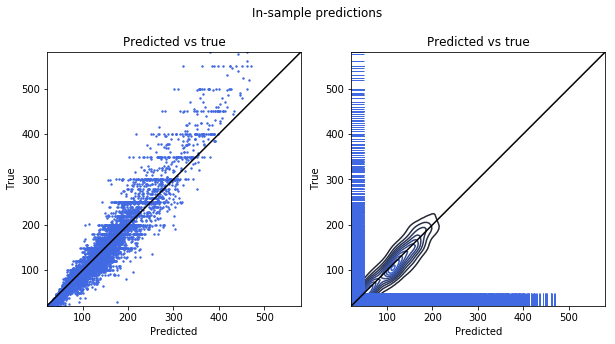

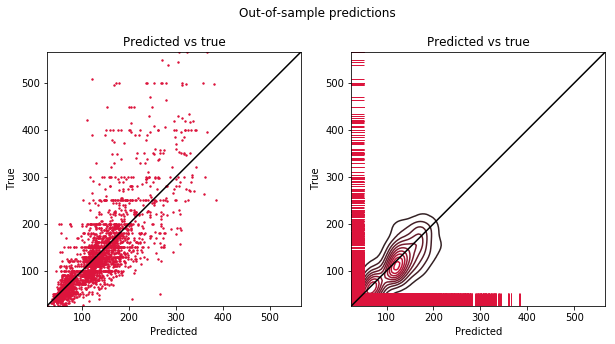

In [439]:
test_tpl = (X_test_add, y_test_add)
rf_add_pca_sub = print_results('RF_add_pca_sub.p', test_tpl, train_tpl, None, True)

In [440]:
best_params = rf_add_pca_sub['fitted_model'].best_params_
best_params

{'rf__n_estimators': 40,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'log2',
 'rf__max_depth': 20,
 'feats__pipe2__pca2__n_components': 2,
 'feats__pipe1__pca1__n_components': 1}

XGBoost

Untransformed
-------------
R2 train: 0.91 / RMSE train 23.54 / MAE train 15.48 / Nobs: 8448
R2 test: 0.55 / RMSE test 55.21 / MAE test 35.02 / Nobs: 2453


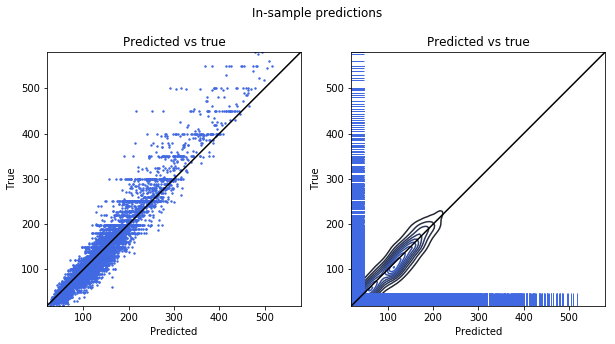

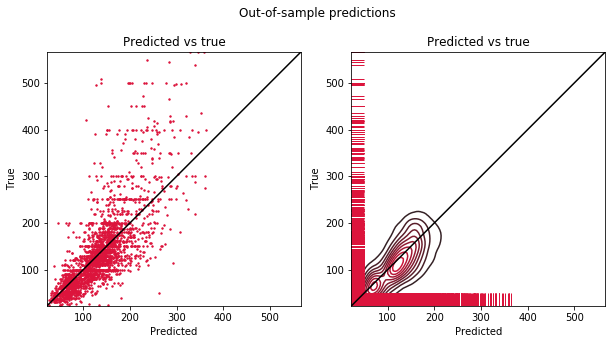

In [441]:
test_tpl = (X_test_add, y_test_add)
xgb_add_pca_sub = print_results('XGB_add_pca_sub.p', test_tpl, train_tpl, None, True)

In [442]:
best_params = xgb_add_pca_sub['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 3,
 'xgb__max_depth': 12,
 'xgb__gamma': 0.4,
 'xgb__eta': 0.25,
 'feats__pipe2__pca2__n_components': 1,
 'feats__pipe1__pca1__n_components': 3}

**Log-transformation**

In [443]:
train_tpl = (X_train_add_log, y_train_add_log)
valid_tpl = (X_valid_add_log, y_valid_add_log)

*Constructed aggregation - 500m*

Random Forest

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.92 / RMSE train 0.07 / MAE train 0.05 / Nobs: 8448
R2 test: 0.68 / RMSE test 0.14 / MAE test 0.10 / Nobs: 2453

Transformed
-----------
R2 train: 0.87 / RMSE train 28.23 / MAE train 16.63 / Nobs: 8448
R2 test: 0.57 / RMSE test 54.43 / MAE test 32.71 / Nobs: 2453



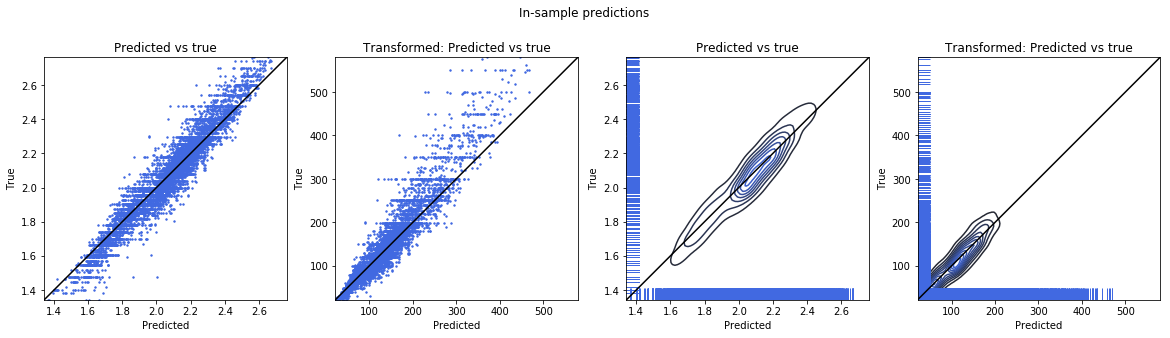

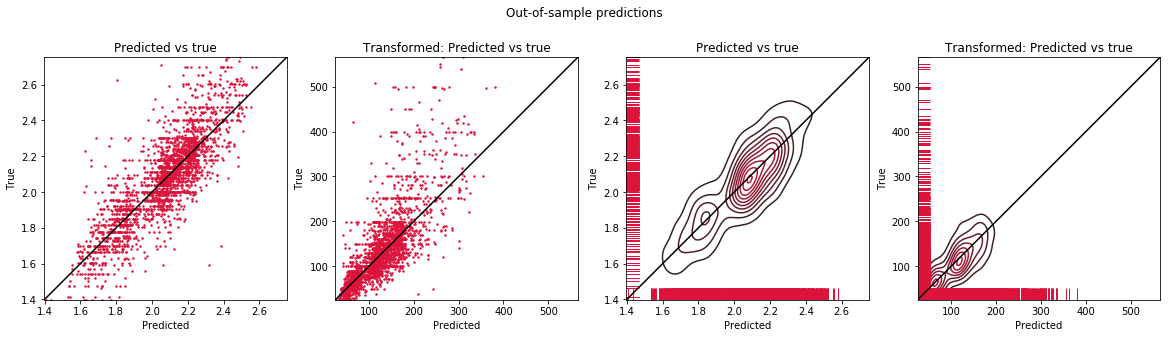

In [444]:
test_tpl = (X_test_add_log, y_test_add_log)
rf_add_pca_sub_log = print_results('RF_add_pca_sub_log.p', test_tpl, train_tpl, 'both', True)

In [445]:
best_params = rf_add_pca_sub_log['fitted_model'].best_params_
best_params

{'rf__n_estimators': 40,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'log2',
 'rf__max_depth': 20,
 'feats__pipe2__pca2__n_components': 2,
 'feats__pipe1__pca1__n_components': 1}

XGBoost

*This step is time consuming and thus set to Raw*

Untransformed
-------------
R2 train: 0.77 / RMSE train 0.12 / MAE train 0.09 / Nobs: 8448
R2 test: 0.68 / RMSE test 0.14 / MAE test 0.10 / Nobs: 2453

Transformed
-----------
R2 train: 0.69 / RMSE train 44.56 / MAE train 27.78 / Nobs: 8448
R2 test: 0.56 / RMSE test 54.76 / MAE test 33.22 / Nobs: 2453



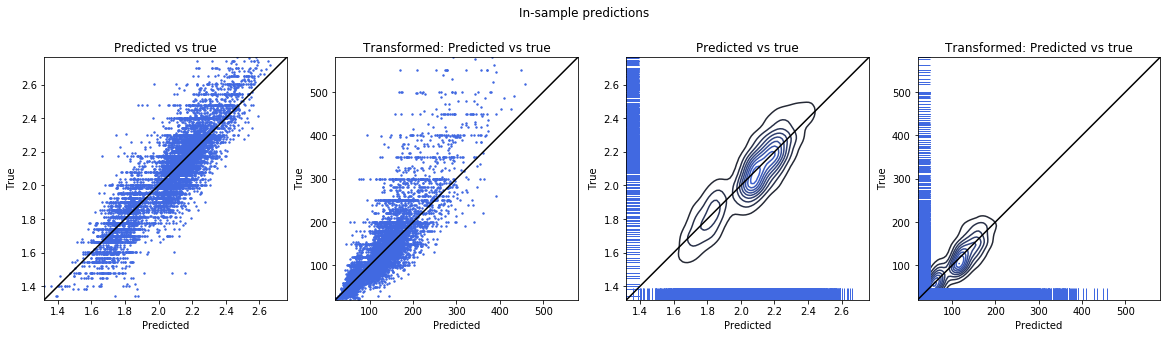

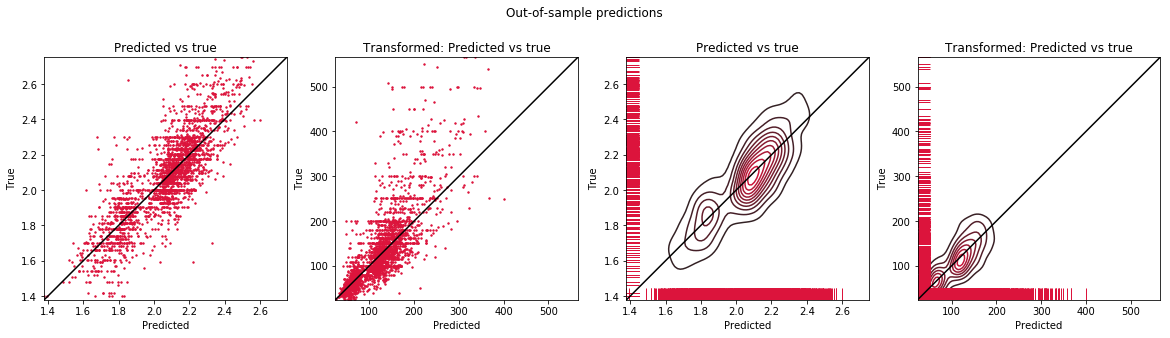

In [446]:
test_tpl = (X_test_add_log, y_test_add_log)
xgb_add_pca_sub_log = print_results('XGB_add_pca_sub_log.p', test_tpl, train_tpl, 'both', True)

In [447]:
best_params = xgb_add_pca_sub_log['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 7,
 'xgb__max_depth': 6,
 'xgb__gamma': 0.0,
 'xgb__eta': 0.05,
 'feats__pipe2__pca2__n_components': 1,
 'feats__pipe1__pca1__n_components': 1}

#### PCA on all variables

To finish, let's apply pca on all of the variables. Again, airbnb prices are predicted directly and indirectly.

In [448]:
# Source: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 10)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2']

# Maximum number of levels in tree (there are 47 features in total in this example)
max_depth = [int(x) for x in np.linspace(5, 20, num = 4)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 10]

param_grid_rf_pca_all = {'rf__n_estimators': n_estimators,
                         'rf__max_features': max_features,
                         'rf__max_depth': max_depth,
                         'rf__min_samples_split': min_samples_split,
                         'rf__min_samples_leaf': min_samples_leaf,
                         'pca__n_components': [1,2,3,4,5,6,7,8,9,10]
                        }

print(param_grid_rf_pca_all)

{'rf__n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200], 'rf__max_features': ['sqrt', 'log2'], 'rf__max_depth': [5, 10, 15, 20, None], 'rf__min_samples_split': [2, 5, 10], 'rf__min_samples_leaf': [1, 2, 4, 6, 10], 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}


In [449]:
param_grid_xgb_pca_all = {'xgb__eta': [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ],
                          'xgb__max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
                          'xgb__min_child_weight' : [ 1, 3, 5, 7 ],
                          'xgb__gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
                          'pca__n_components': [1,2,3,4,5,6,7,8,9,10]
                         }
param_grid_xgb_pca_all

{'xgb__eta': [0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
 'xgb__max_depth': [3, 4, 5, 6, 8, 10, 12, 15],
 'xgb__min_child_weight': [1, 3, 5, 7],
 'xgb__gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
 'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

**Direct**

In [450]:
train_tpl = (X_train_add, y_train_add)
valid_tpl = (X_valid_add, y_valid_add)

*Constructed aggregation - 500m*

Random Forest

*This step is time consuming and thus set to Raw* 

Untransformed
-------------
R2 train: 0.80 / RMSE train 35.80 / MAE train 24.31 / Nobs: 8448
R2 test: 0.58 / RMSE test 53.77 / MAE test 33.65 / Nobs: 2453


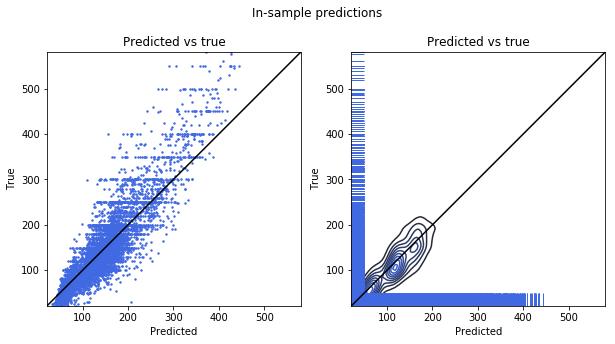

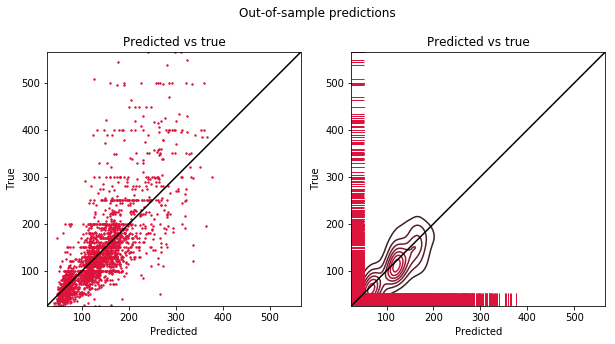

In [451]:
test_tpl = (X_test_add, y_test_add)
rf_add_pca_all = print_results('RF_add_pca_all.p', test_tpl, train_tpl, None, True)

In [452]:
best_params = rf_add_pca_all['fitted_model'].best_params_
best_params

{'rf__n_estimators': 100,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'sqrt',
 'rf__max_depth': 15,
 'pca__n_components': 9}

XGBoost

Untransformed
-------------
R2 train: 0.55 / RMSE train 53.28 / MAE train 35.41 / Nobs: 8448
R2 test: 0.51 / RMSE test 58.16 / MAE test 37.51 / Nobs: 2453


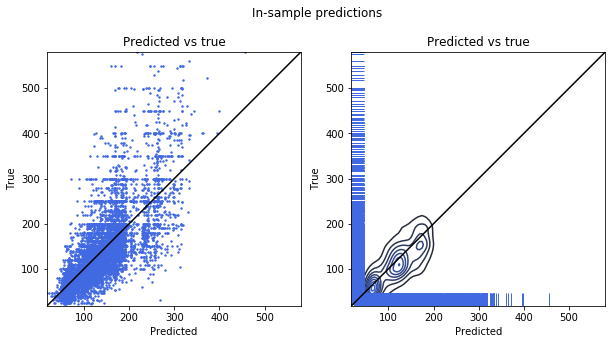

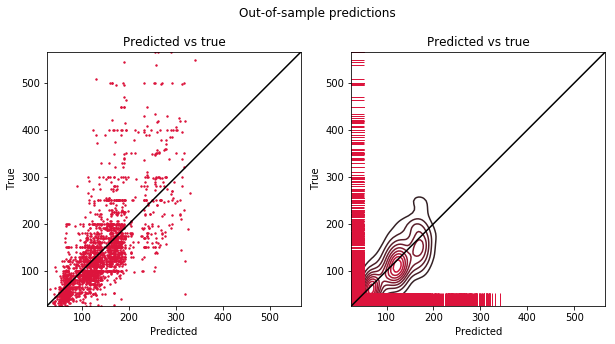

In [453]:
test_tpl = (X_test_add, y_test_add)
xgb_add_pca_all = print_results('XGB_add_pca_all.p', test_tpl, train_tpl, None, True)

In [454]:
best_params = xgb_add_pca_all['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 1,
 'xgb__max_depth': 3,
 'xgb__gamma': 0.4,
 'xgb__eta': 0.3,
 'pca__n_components': 2}

**Log-transformation**

In [455]:
train_tpl = (X_train_add_log, y_train_add_log)
valid_tpl = (X_valid_add_log, y_valid_add_log)

*Constructed aggregation - 500m*

Random Forest

Untransformed
-------------
R2 train: 0.73 / RMSE train 0.13 / MAE train 0.09 / Nobs: 8448
R2 test: 0.67 / RMSE test 0.14 / MAE test 0.10 / Nobs: 2453

Transformed
-----------
R2 train: 0.62 / RMSE train 48.90 / MAE train 30.18 / Nobs: 8448
R2 test: 0.54 / RMSE test 55.96 / MAE test 33.69 / Nobs: 2453



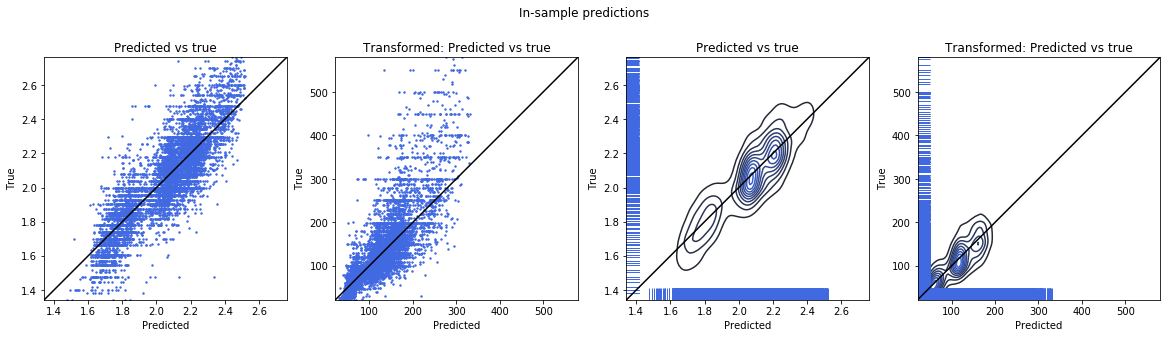

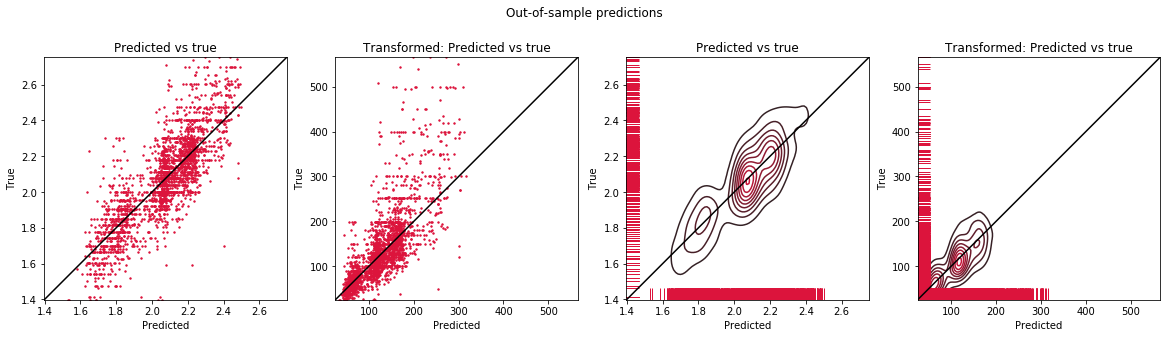

In [456]:
test_tpl = (X_test_add_log, y_test_add_log)
rf_add_pca_all_log = print_results('RF_add_pca_all_log.p', test_tpl, train_tpl, 'both', True)

In [457]:
best_params = rf_add_pca_all_log['fitted_model'].best_params_
best_params

{'rf__n_estimators': 60,
 'rf__min_samples_split': 2,
 'rf__min_samples_leaf': 6,
 'rf__max_features': 'log2',
 'rf__max_depth': 10,
 'pca__n_components': 5}

XGBoost

Untransformed
-------------
R2 train: 0.67 / RMSE train 0.14 / MAE train 0.11 / Nobs: 8448
R2 test: 0.63 / RMSE test 0.15 / MAE test 0.11 / Nobs: 2453

Transformed
-----------
R2 train: 0.54 / RMSE train 54.06 / MAE train 33.72 / Nobs: 8448
R2 test: 0.49 / RMSE test 59.05 / MAE test 35.82 / Nobs: 2453



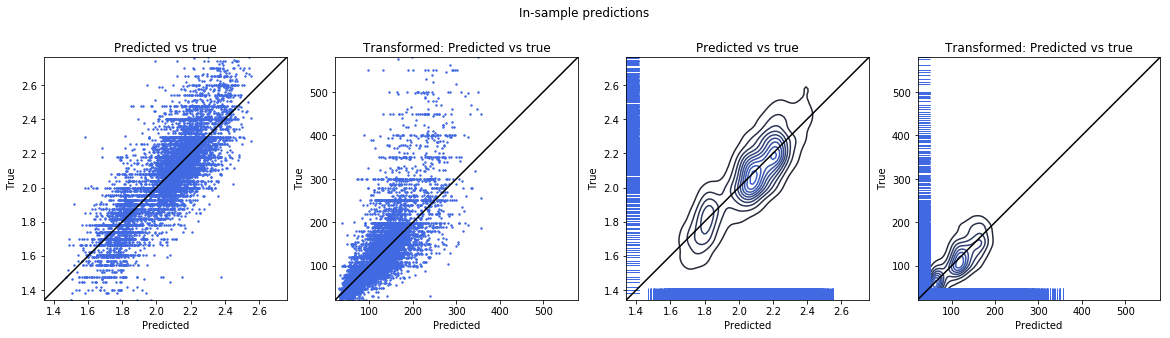

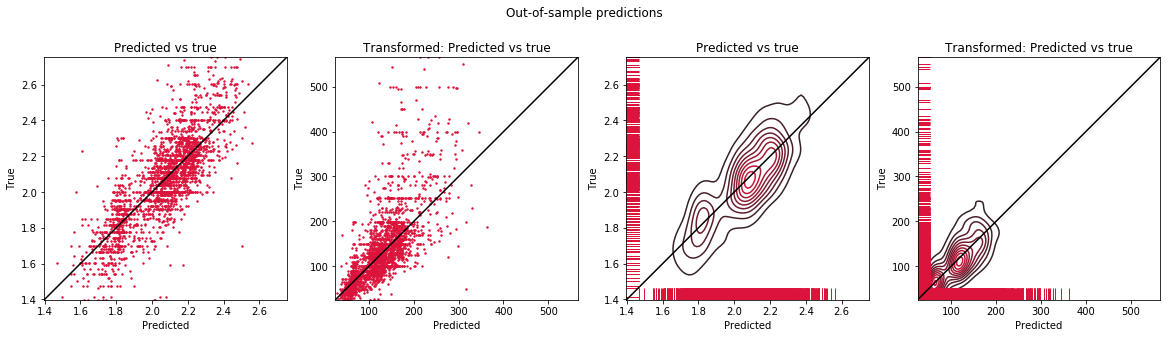

In [458]:
test_tpl = (X_test_add_log, y_test_add_log)
xgb_add_pca_all_log = print_results('XGB_add_pca_all_log.p', test_tpl, train_tpl, 'both', True)

In [459]:
best_params = xgb_add_pca_all_log['fitted_model'].best_params_
best_params

{'xgb__min_child_weight': 3,
 'xgb__max_depth': 3,
 'xgb__gamma': 0.0,
 'xgb__eta': 0.25,
 'pca__n_components': 3}

#### Summary

In the following plots the results from the `Random Forest` and `XGBoost` algorithms are run on the datasets with the additional variables `Air_cleaning_fee` and `Air_review_score_location` are shown. The results of the same algorithms applied on the smaller dataset from previous sections are plotted as a reference. The additional variables does not help to improve the predictions. Applying pca even lowers the performance substantially.

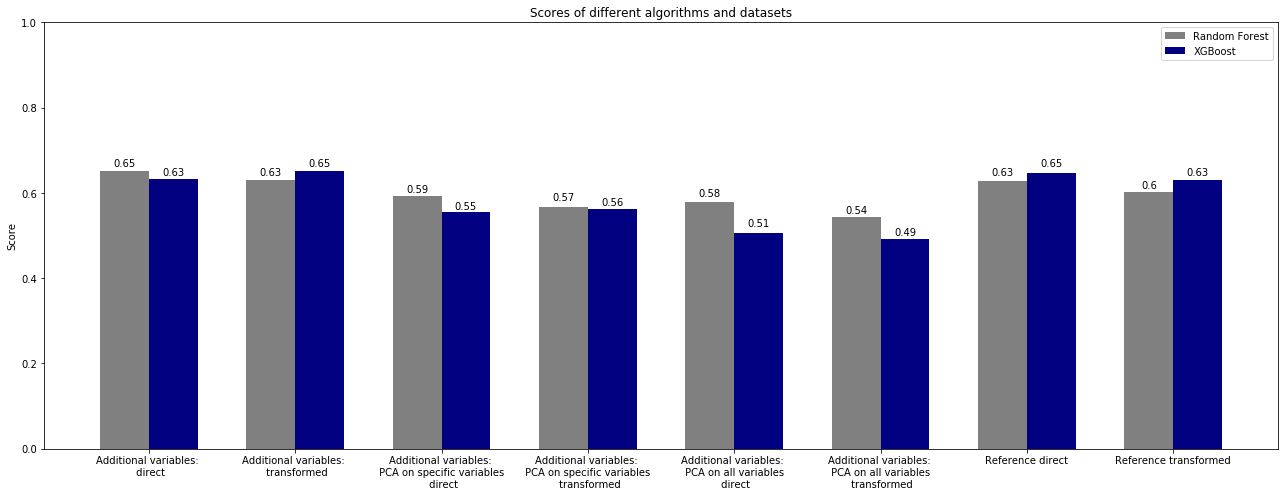

In [460]:
# Source: https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

scores_rf = [rf_add['test_r2'],
             rf_add_log['test_r2_transformed'],
             rf_add_pca_sub['test_r2'],
             rf_add_pca_sub_log['test_r2_transformed'],
             rf_add_pca_all['test_r2'],
             rf_add_pca_all_log['test_r2_transformed'],
             rf_500m_ut['test_r2'],
             rf_500m['test_r2_transformed']]

scores_xgb = [xgb_add['test_r2'],
              xgb_add_log['test_r2_transformed'],
              xgb_add_pca_sub['test_r2'],
              xgb_add_pca_sub_log['test_r2_transformed'],
              xgb_add_pca_all['test_r2'],
              xgb_add_pca_all_log['test_r2_transformed'],
              xgb_500m_ut['test_r2'],
              xgb_500m['test_r2_transformed']]

labels = ['Additional variables: \n direct', 
          'Additional variables: \n transformed', 
          'Additional variables: \n PCA on specific variables \n direct', 
          'Additional variables: \n PCA on specific variables \n transformed',
          'Additional variables: \n PCA on all variables \n direct', 
          'Additional variables: \n PCA on all variables \n transformed',
          'Reference direct',
          'Reference transformed']

factor = 1.5
x = np.arange(len(labels))*factor  # the label locations
width = 0.50  # the width of the bars

fig, ax = plt.subplots(figsize=(18, 7))
rects1 = ax.bar(x - 0.5*width, scores_rf, width, label='Random Forest', color='grey')
rects2 = ax.bar(x + 0.5*width, scores_xgb, width, label='XGBoost', color='navy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Scores of different algorithms and datasets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylim([0.0,1])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = np.round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()